In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import networkx as nx
import EoN
import numpy as np

## Testing meaning of EoN transmission_rate parameter
#### Purpose
The purpose of this notebook is to test that the EoN transmission rate parameter (which the EoN package calls tau) is the same as our textbook's transmission rate (which it calls beta). 

#### Experimental Design
Our experiment is as follows. We know how to analytically calculate the tranmission probability (the probability that the infected node will infect the susceptible node), using the formula: 

$Transmission\ Probability = 1-e^{-Transmission\ Rate * Infectious\ Period}$   (see page 626 of textbook)

We can also experimentally calculate the transmission probability. We do this by using a network of 2 connected nodes, one infected, one susceptible. We then run many trials and count how many times the infected node infects the susceptible node. The transmission probability is equal to the percent of trials where the infected node infected the susceptible node.

If the experimental transmission probability is equal to the analytic transmission probability, it supports the idea that the EoN transmission rate is the same as the textbook's transmission rate. If not, then the inverse hypothesis is supported. (I think.)

#### Code and Results

Analytic transmission probability: 0.3486
Experimental transmission probability: 0.2986
Wall time: 5.39 s


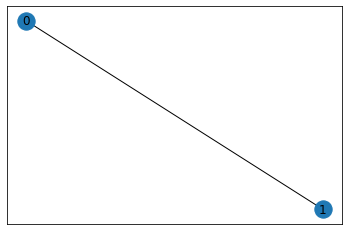

In [10]:
%%time
# Parameters
transmission_rate = 0.03  # transmission rate
gamma = 0.07 # recovery rate, which averages recovery to 14 days
trials = 100000

# Analytic prediction of transmission probability (i.e. using formula)
infectious_period = 1/gamma
analytic_transmission_probability = 1 - np.exp(-transmission_rate*infectious_period)
print(f'Analytic transmission probability: {analytic_transmission_probability:.4f}')

# Experimental estimate of transmission probability
G = nx.fast_gnp_random_graph(2, 1)
nx.draw_networkx(G)

# Track the number of trials where the virus is transmitted
times_virus_was_transmitted = 0
for i in range(trials):
    # Run simulation
    t, S, I, R = EoN.fast_SIR(G, transmission_rate, gamma, initial_infecteds=0)

    # If there are 2 recovered people at end, then virus was transmitted
    if R[-1] == 2:  
        times_virus_was_transmitted += 1

experimental_transmission_probability = times_virus_was_transmitted / trials
print(f'Experimental transmission probability: {experimental_transmission_probability:.4f}')

#### Discussion
Well, 0.2986 is not 0.3486. Additionally, further (unshown) experiments show that, as gamma decreases, the analytic prediction and the experimental results increasingly further apart.

#### Conclusion
So it seems than the EoN transmission rate (tau) parameter is not the transmission rate (beta) described in the textbook.